# Ornstein Uhlenbeck process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

## Example: Ornstein-Uhenbeck forward process

$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$

Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), 
$$
where $Z(t_i)$ are iid with $N(0, 1)$. 

If $X(0)\sim N(0, 1)$, then
$$
E[X(t)] = 0, \quad \text{Var}[X(t)] = \sigma_t^2 = e^{-2\beta t} + \frac{\sigma^2}{2\beta}\left(1 - e^{-2\beta t}\right).
$$

In [2]:
beta = 2
sigma = 5

# T: Terminal time
T = 2

# N: number of trials
N = 1000

# M: number of steps
M = 1000
dt = T/M
time = np.linspace(0, T, M+1)

In [3]:
# Euler-Maruyama method:
X_0 = np.zeros((N, M+1))

# sample initial condition from N(0, 1)
X_0[:,0] = np.random.randn(N)

# iteration
for ii in range(M):
    X_0[:, ii+1] = X_0[:, ii] - beta*dt*X_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)    

In [4]:
# maximum likelihood estimation at t= T
mean_M = np.mean(X_0[:,M])
std_M = np.std(X_0[:,M])

# The corresponding normal distribution
y = np.linspace(-10, 10, 100)

# at t=0
height_0 = 1.0/np.sqrt(2.0*np.pi)
pdf_0 = np.exp(-0.5*(y**2))*height_0

# at t=T
height_M = 1.0/std_M/np.sqrt(2.0*np.pi)
pdf_M = np.exp(-0.5*((y-mean_M)/std_M)**2)*height_M

The left panel shows the initial sampling at X(t=0).

The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.21107612318836214
std =  2.542640583905076

Theoretical results:
Theoretical meam =  0.0
Theoretical std =  2.4996477394231995


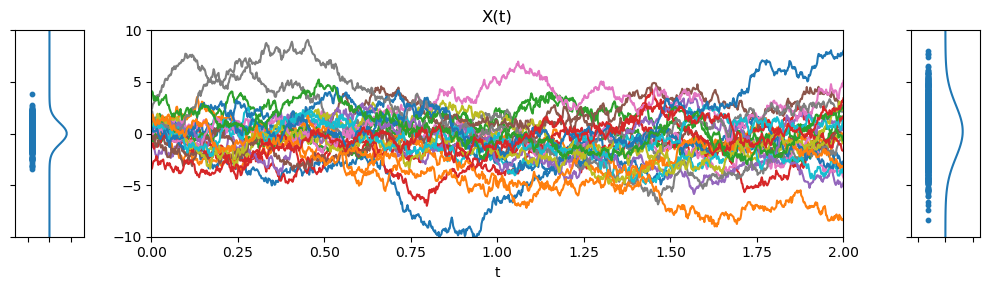

In [5]:
print('The left panel shows the initial sampling at X(t=0).')
print('')
print('The right panel shows the results at X(t=T) and its maximum likelihood estimation (MLE).')
print('MLE:')
print('meam = ', mean_M)
print('std = ', std_M)
print('')
print('Theoretical results:')
print('Theoretical meam = ', 0.0)
sigma_T_square = np.exp(-2.0*beta*T)+ (1-np.exp(-2.0*beta*T))*(sigma**2)/(2.0*beta)
sigma_T = np.sqrt(sigma_T_square)
print('Theoretical std = ', sigma_T)

f, (a2, a0, a1) = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 10, 1]})
for ii in sample(range(N), 20):
    a0.plot(time, X_0[ii,:])

imax = np.argmax(X_0[:,M])
a0.plot(time, X_0[imax,:])
imin = np.argmin(X_0[:,M])
a0.plot(time, X_0[imin,:])
imax = np.argmax(X_0[:,0])
a0.plot(time, X_0[imax,:])
imin = np.argmin(X_0[:,0])
a0.plot(time, X_0[imin,:])


a2.scatter(X_0[:,0]*0-height_0, X_0[:,0], s=10.0)
a2.plot(pdf_0, y)
a2.set_xlim(-height_0*2, height_0*2)
a2.set_ylim(-10, 10)
a2.set_xticklabels([])
a2.set_yticklabels([])

a0.set_xlim(0, T)
a0.set_ylim(-10, 10)
a0.set(xlabel='t')
a0.set(title='X(t)')

a1.scatter(X_0[:,M]*0-height_M, X_0[:,M], s=10.0)
a1.plot(pdf_M, y)
a1.set_xlim(-height_M*2, height_M*2)
a1.set_ylim(-10, 10)
a1.set_xticklabels([])
a1.set_yticklabels([])

f.tight_layout()
#plt.show()

## Example: Ornstein-Uhenbeck reverse process

$$
dX_t = \left(-\beta + \frac{\sigma^2}{\sigma^2_t}\right) X_t dt + \sigma dW_t, \quad X_N\sim N(0, \sigma_T^2).
$$

Reverse time Euler-Maruyama method:
$$
\hat{X}(t_{n-1}) = \hat{X}(t_{n}) +  \left(-\beta + \frac{\sigma^2}{\sigma^2_t}\right) \hat{X}(t_{n}) (-\Delta t) + \sigma\sqrt{\Delta t}Z(t_n), 
$$
where $Z(t_i)$ are iid with $N(0, 1)$. 

In [6]:
print('beta    = ', beta)
print('sigma   = ', sigma)
print('sigma_T = ', sigma_T)
print('T       = ', T)
print('dt      = ', dt)
print('M       = ', M)

beta    =  2
sigma   =  5
sigma_T =  2.4996477394231995
T       =  2
dt      =  0.002
M       =  1000


In [7]:
# Euler-Maruyama method:
Y_0 = np.zeros((N, M+1))

# sample initial condition from N(0, sigma_T)
Y_0[:,M] = sigma_T*np.random.randn(N)

# iteration
for ii in range(M):
    tk = (M-ii)*dt
    sigma_tk_square = np.exp(-2.0*beta*tk)+ (1-np.exp(-2.0*beta*tk))*(sigma**2)/(2.0*beta)
    Y_0[:, M-ii-1] = Y_0[:, M-ii] + (-dt)*( -beta + (sigma**2)/sigma_tk_square)*Y_0[:, M-ii] + sigma*np.sqrt(dt)*np.random.randn(N)


In [8]:
# maximum likelihood estimation at t= 0
mean_0 = np.mean(Y_0[:, 0])
std_0 = np.std(Y_0[:, 0])

# The corresponding normal distribution
# at t=0
height_0 = 1.0/std_0/np.sqrt(2.0*np.pi)
pdf_0 = np.exp(-0.5*((y-mean_0)**2))*height_0

# at t=T
height_M = 1.0/sigma_T/np.sqrt(2.0*np.pi)
pdf_M = np.exp(-0.5*(y/sigma_T)**2)*height_M

The right panel shows the initial sampling at Y(t=T).

The left panel shows the results at Y(t=0) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.01059135912310781
std =  0.9970729073312384

Theoretical results
Theoretical meam =  0.0
Theoretical std =  1.0


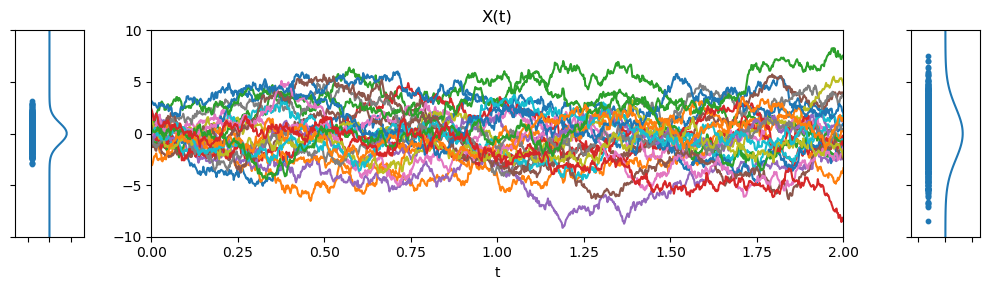

In [9]:
print('The right panel shows the initial sampling at Y(t=T).')
print('')

print('The left panel shows the results at Y(t=0) and its maximum likelihood estimation (MLE).')
print('MLE:')
print('meam = ', mean_0)
print('std = ', std_0)
print('')
print('Theoretical results')
print('Theoretical meam = ', 0.0)
print('Theoretical std = ', 1.0)

f, (a2, a0, a1) = plt.subplots(1, 3, figsize=(10, 3), gridspec_kw={'width_ratios': [1, 10, 1]})
for ii in sample(range(N), 20):
    a0.plot(time, Y_0[ii,:])

imax = np.argmax(Y_0[:,0])
a0.plot(time, Y_0[imax,:])
imin = np.argmin(Y_0[:,0])
a0.plot(time, Y_0[imin,:])
imax = np.argmax(Y_0[:,M])
a0.plot(time, Y_0[imax,:])
imin = np.argmin(Y_0[:,M])
a0.plot(time, Y_0[imin,:])

a2.scatter(Y_0[:,0]*0-height_0, Y_0[:,0], s=10.0)
a2.plot(pdf_0, y)
a2.set_xlim(-height_0*2, height_0*2)
a2.set_ylim(-10, 10)
a2.set_xticklabels([])
a2.set_yticklabels([])

a0.set_xlim(0, T)
a0.set_ylim(-10, 10)
a0.set(xlabel='t')
a0.set(title='X(t)')

a1.scatter(Y_0[:,M]*0-height_M, Y_0[:,M], s=10.0)
a1.plot(pdf_M, y)
a1.set_xlim(-height_M*2, height_M*2)
a1.set_ylim(-10, 10)
a1.set_xticklabels([])
a1.set_yticklabels([])

f.tight_layout()
plt.show()